This notebook is just me playing with different filters/image processing algorithms available.

*   Canny
*   Wavelets 
* Log/Zero-crossing
* Watershed

Median filtering seemed to work best for the purpose of removing artifacts so that's in a separate notebook. 

Sample image can be found at: https://github.com/LieberInstitute/HumanPilot/blob/master/10X/151670/tissue_hires_image.png

## Canny/hysteresis thresholding

In [ ]:
!pip install SimpleITK

In [ ]:
import numpy as np
from scipy import ndimage, misc
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import pywt
#import SimpleITK as sitk

In [ ]:
import imageio

In [ ]:
image = sitk.ReadImage('/content/tissue_lowres_image.png', sitk.sitkInt8)
        # 8-bit cameraman grayscale image
image = sitk.Cast(image, sitk.sitkFloat64)

In [ ]:
edges1 = sitk.CannyEdgeDetection(image, lowerThreshold=5, \
                    upperThreshold=10, variance=[1, 1])
edges2 = sitk.CannyEdgeDetection(image, lowerThreshold=5, \
                    upperThreshold=10, variance=[3, 3])

In [ ]:
image = sitk.GetArrayFromImage(image)
edges1 = sitk.GetArrayFromImage(edges1)
edges2 = sitk.GetArrayFromImage(edges2)

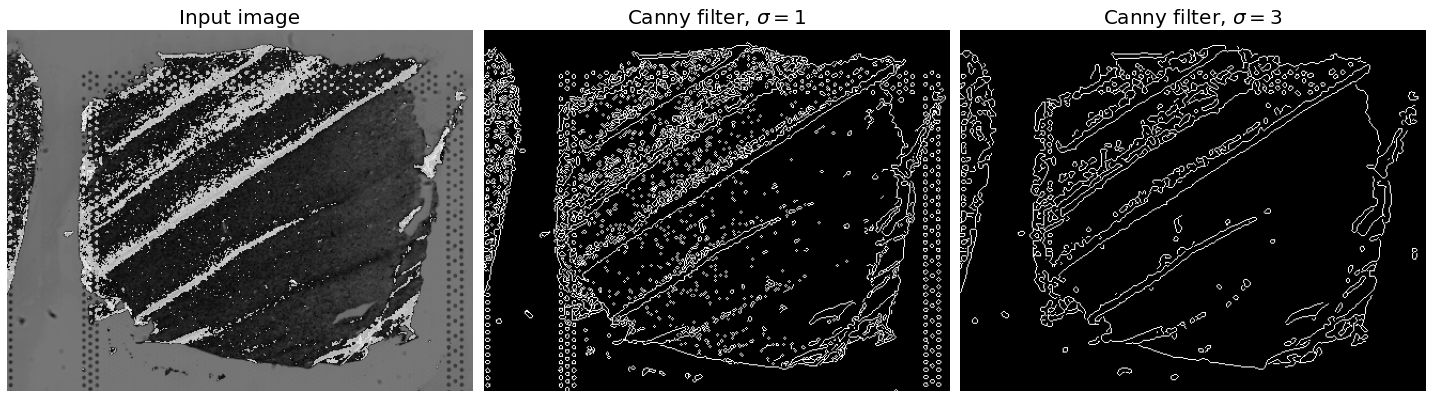

In [ ]:
fig = plt.figure(figsize=(20, 6))
plt.subplot(131), plt.imshow(image, cmap=plt.cm.gray), \
                    plt.axis('off')
plt.title('Input image', fontsize=20)
plt.subplot(132), plt.imshow(edges1, cmap=plt.cm.gray), \
                    plt.axis('off')
plt.title('Canny filter, $\sigma=1$', fontsize=20)
plt.subplot(133), plt.imshow(edges2, cmap=plt.cm.gray), \
                    plt.axis('off')
plt.title('Canny filter, $\sigma=3$', fontsize=20)
fig.tight_layout()
plt.show()

## LoG/zero-crossing

In [ ]:
def any_neighbor_zero(img, i, j):
 for k in range(-1,2):
   for l in range(-1,2):
     if k == 0 and l == 0: continue # skip the input pixel
     if img[i+k, j+k] == 0:
        return True
 return False

In [ ]:
def zero_crossing(img):
 img[img > 0] = 1
 img[img < 0] = 0
 out_img = np.zeros(img.shape)
 for i in range(1,img.shape[0]-1):
  for j in range(1,img.shape[1]-1):
    if img[i,j] > 0 and any_neighbor_zero(img, i, j):
       out_img[i,j] = 255
 return out_img

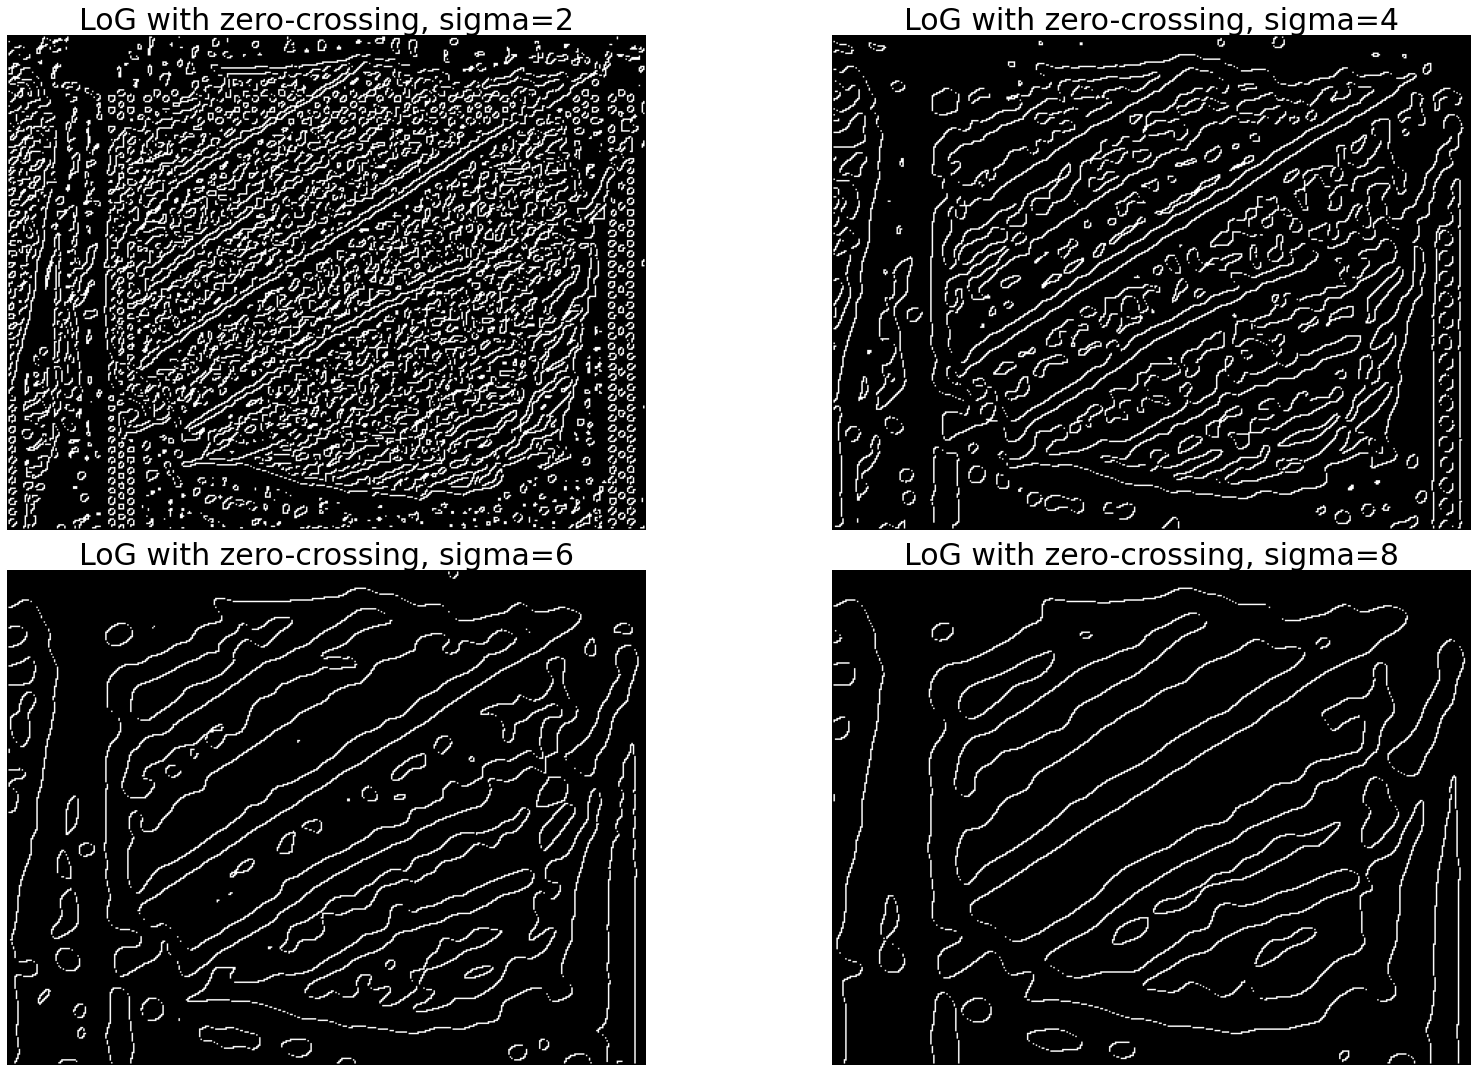

In [ ]:
img = rgb2gray(imageio.imread('/content/tissue_lowres_image.png'))
fig = plt.figure(figsize=(25,15))
plt.gray() # show the filtered result in grayscale
for sigma in range(2,10, 2):
 plt.subplot(2,2,sigma/2)
 result = ndimage.gaussian_laplace(img, sigma=sigma)
 result = zero_crossing(result)
 plt.imshow(result)
 plt.axis('off')
 plt.title('LoG with zero-crossing, sigma=' + str(sigma), size=30)
plt.tight_layout()
plt.show()

## Wavelets

In [ ]:
median_out_grey = rgb2gray(median_out)

In [ ]:
wavelist = 'db1'

In [ ]:
coeffs2 = pywt.dwt2(median_out_grey, 'haar' )
titles = ['Approximation', ' Horizontal detail', 'Vertical detail', \
          'Diagonal detail']
LL, (LH, HL, HH) = coeffs2


In [ ]:
fig = plt.figure(figsize=(30, 30))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(2, 2, i + 1)
    a = abs(a)
    if i > 0:  # for all detail subbands 
        th = threshold_otsu(a) #otsu's thresholding - determines a threshold 
                              #value for each subband
        a[a > th] = 1
        a[a <= th] = 0
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=20)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

In [ ]:
titles = ['Approximation', ' Horizontal detail', 'Vertical detail', \
          'Diagonal detail']
LL, (LH, HL, HH) = coeffs2

In [ ]:
fig = plt.figure(figsize=(20, 20))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(2, 2, i + 1)
    a = abs(a)
    if i > 0:
        th = threshold_otsu(a)
        a[a > th] = 1
        a[a <= th] = 0
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=20)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

In [ ]:
coeffs3 = pywt.dwt2(LL, wavelist)

In [ ]:
titles = ['Approximation', ' Horizontal detail', 'Vertical detail', \
          'Diagonal detail']
LL2, (LH2, HL2, HH2) = coeffs3

In [ ]:
fig = plt.figure(figsize=(20, 20))
for i, a in enumerate([LL2, LH2, HL2, HH2]):
    ax = fig.add_subplot(2, 2, i + 1)
    a = abs(a)
    if i > 0:
        th = threshold_otsu(a)
        a[a > th] = 1
        a[a <= th] = 0
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=20)
    
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

## Shrink

In [ ]:
image = Image.open('/content/tissue_hires_image.png')
  
# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)

PNG
(436, 338)
RGB


In [ ]:
from skimage.restoration import (denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio


In [ ]:
im_bayes = denoise_wavelet(original, wavelet= 'bior3.5', wavelet_levels= 5,
                           method='BayesShrink', mode='soft',
                           rescale_sigma=False)
psnr_bayes = peak_signal_noise_ratio(original, im_bayes)
psnr_bayes

/usr/local/lib/python3.7/dist-packages/skimage/restoration/_denoise.py:858: UserWarning: Wavelet thresholding was designed for use with orthogonal wavelets. For nonorthogonal wavelets such as bior3.5, results are likely to be suboptimal.
  wavelet_levels=wavelet_levels)


In [ ]:
import skimage.io

In [ ]:
psnr_bayes = peak_signal_noise_ratio(original, im_bayes)
psnr_bayes

77.48706982050248

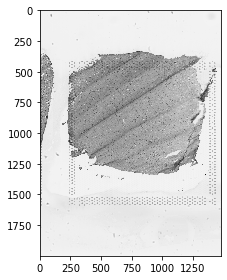

In [ ]:
skimage.io.imshow(original)

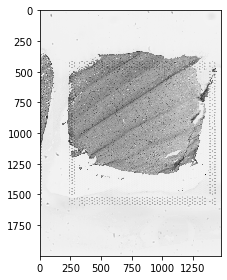

In [ ]:
skimage.io.imshow(im_bayes)

In [ ]:
im_visushrink2 = denoise_wavelet(original, wavelet_levels= 10, sigma = sigma_est,
                                 method='VisuShrink', mode='soft',rescale_sigma=True)

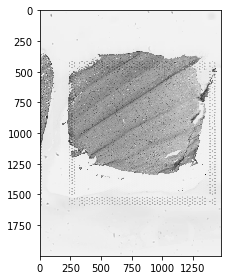

In [ ]:
skimage.io.imshow(im_visushrink2)

In [ ]:
psnr_visu = peak_signal_noise_ratio(original, im_visushrink2)
psnr_visu

45.150492038331684

In [ ]:
sigma_est = estimate_sigma(original, average_sigmas=True)
sigma_est

0.0017026672263726716

## Watershed

In [ ]:
img = cv.imread('/content/tissue_hires_image.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)


In [ ]:
# noise removal
kernel = np.ones((1,1),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)

In [ ]:
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=10)

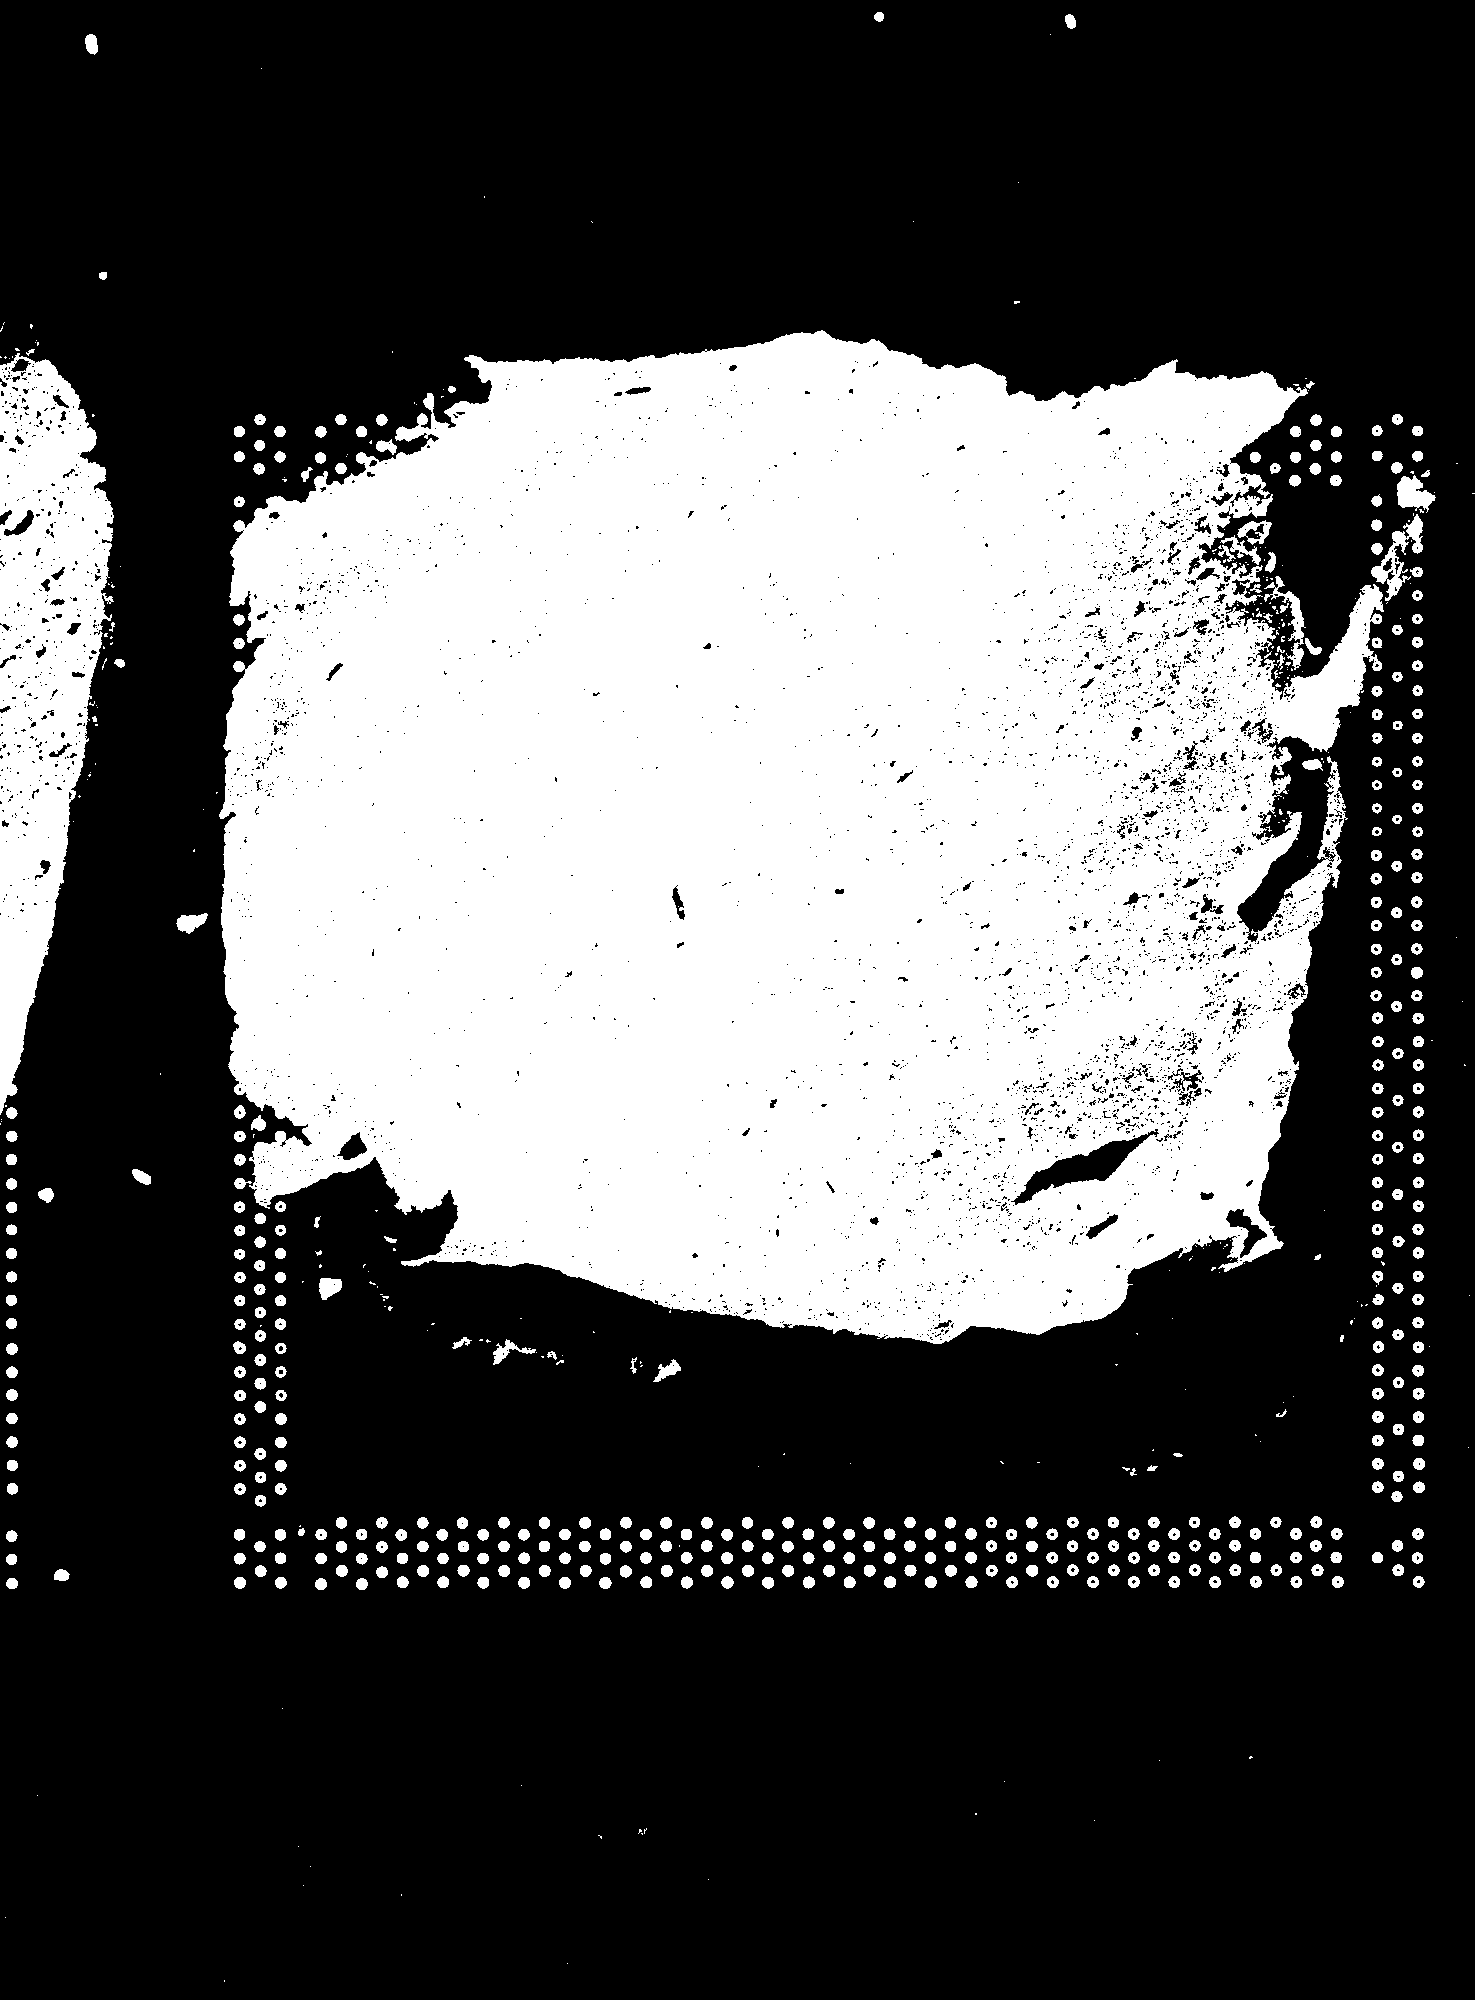

In [ ]:
cv2_imshow(sure_bg)

In [ ]:
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,3)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)

In [ ]:

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

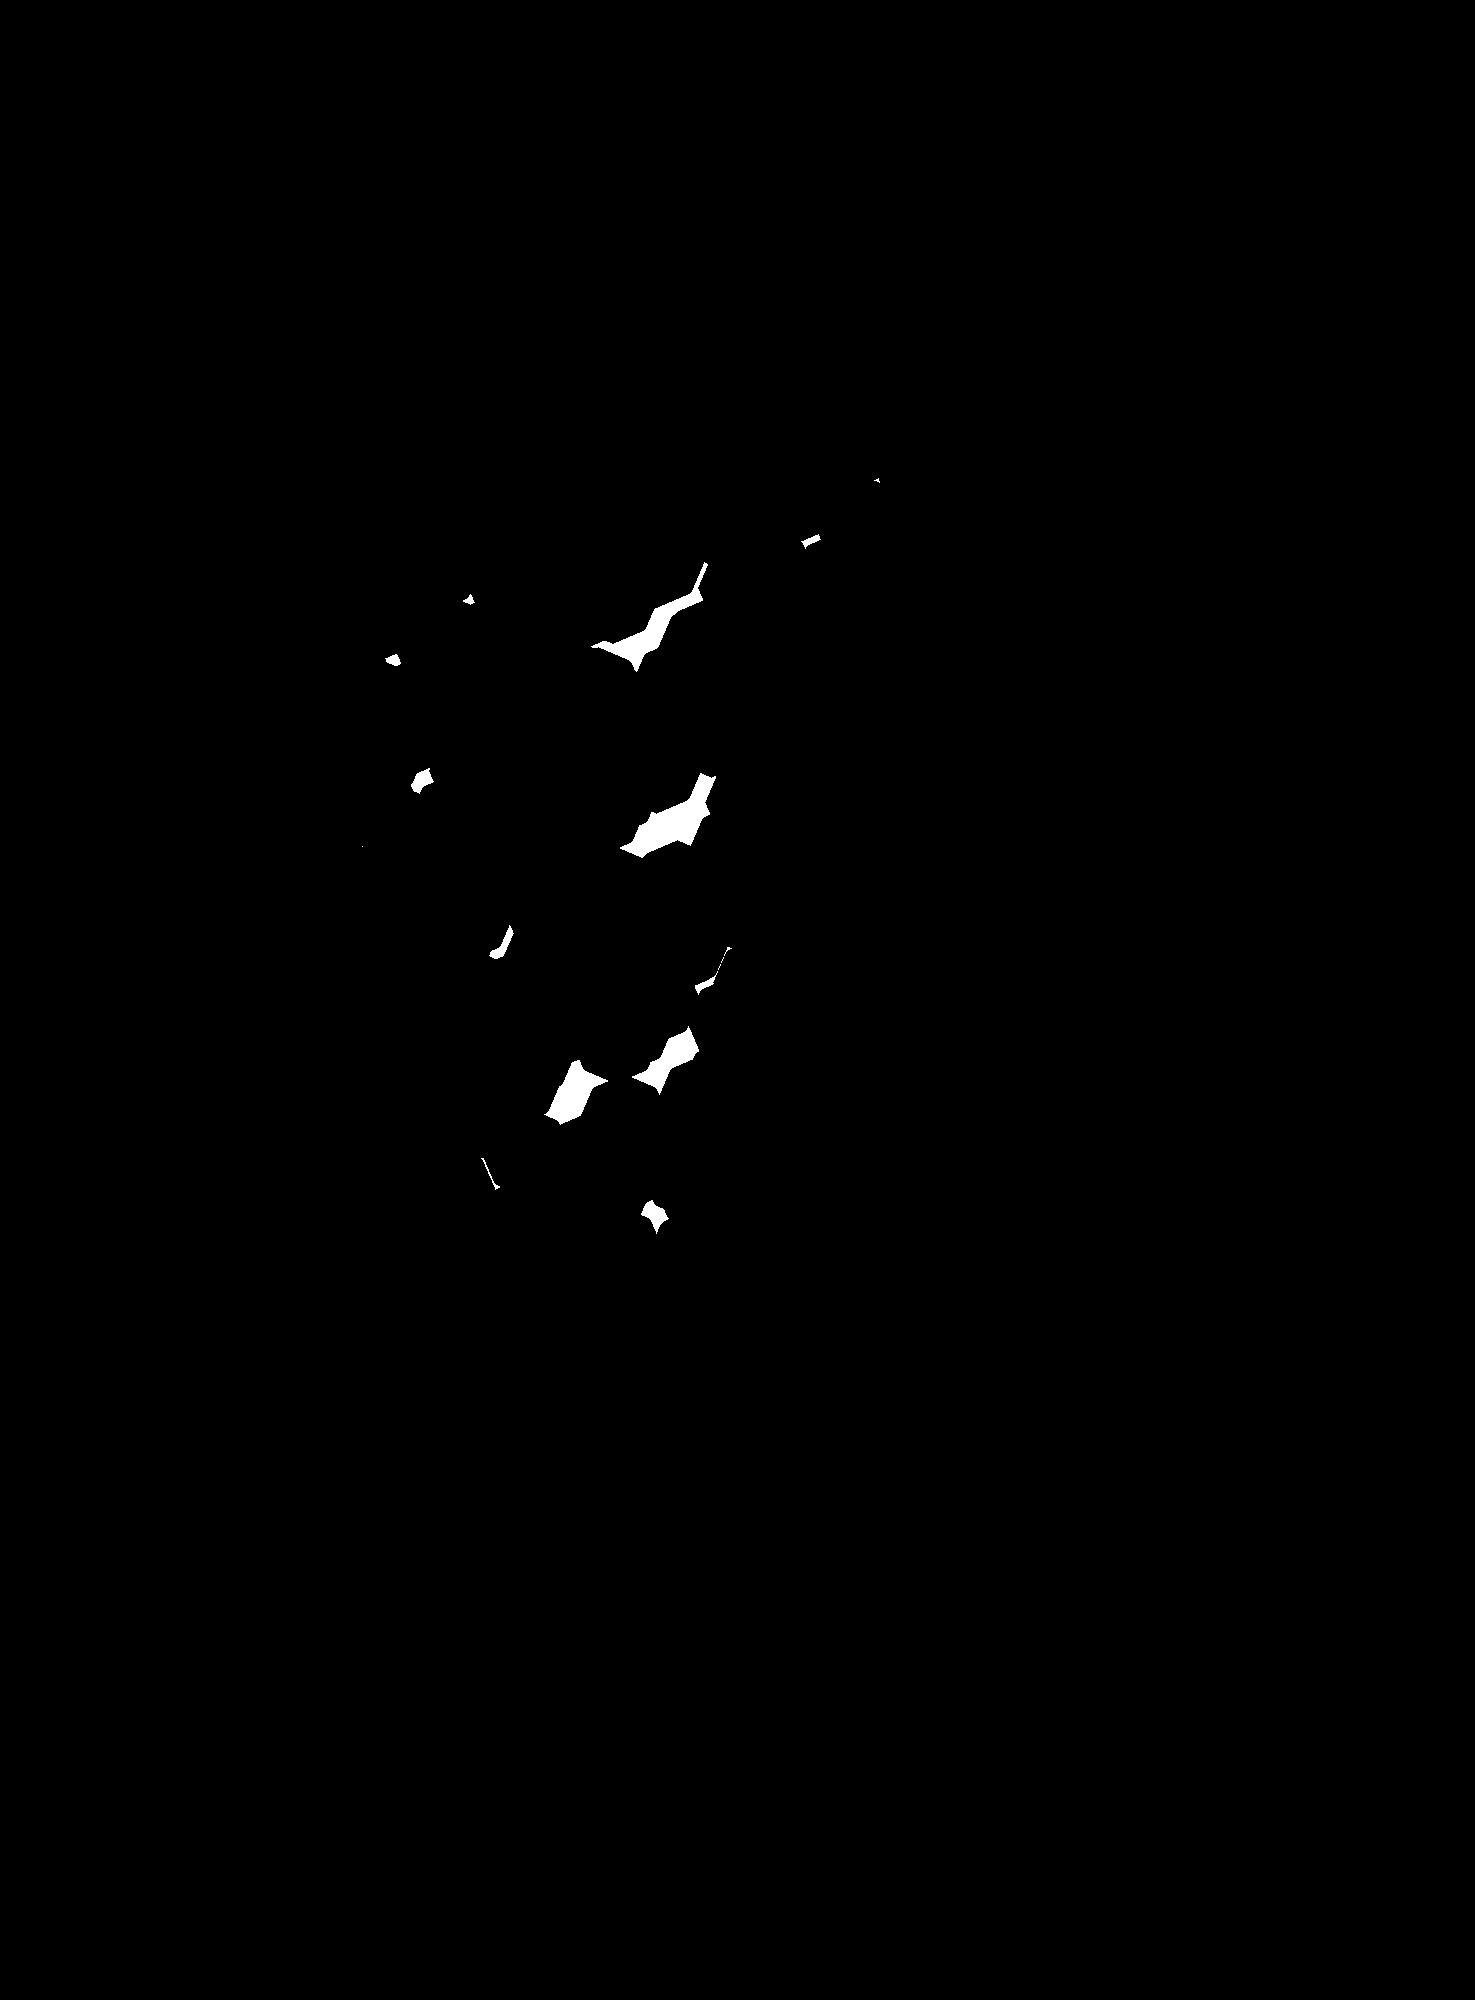

In [ ]:
cv2_imshow(sure_fg)

In [ ]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)


In [ ]:
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0


In [ ]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

In [ ]:
from google.colab.patches import cv2_imshow


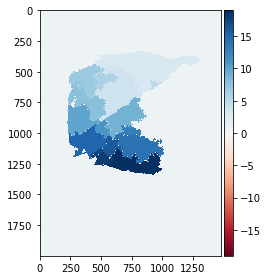

In [ ]:
skimage.io.imshow(markers)